In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


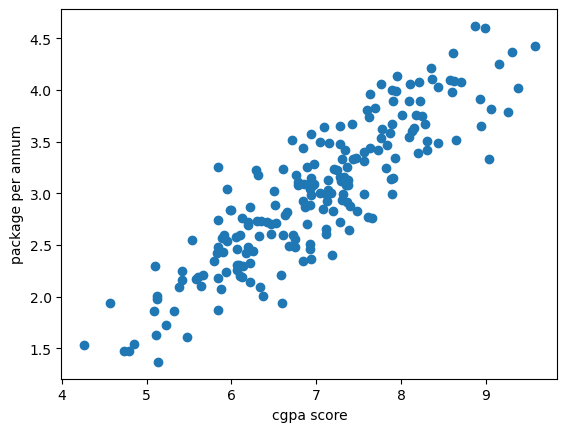

In [4]:
plt.scatter(x=df['cgpa'], y = df['package'])
plt.xlabel('cgpa score')
plt.ylabel('package per annum')
plt.show()

In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [ ]:
# no preprocessing required in this simple linear regression dataset

In [8]:
# split the data into independent variable and dependent variable

x = df[['cgpa']]
y = df[['package']]

In [9]:
x.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [10]:
y.head()

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [11]:
df.shape

(200, 2)

In [33]:
# Split the data into training and test where training is for building a model and test is for prediction
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=1)

In [36]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(140, 1) (60, 1) (140, 1) (60, 1)


# Building Linear Regession Model

In [38]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [45]:
# Predict with test data
y_pred_test = linear_model.predict(x_test)
y_pred_train = linear_model.predict(x_train)

In [42]:
y_test

,package
58,3.09
40,4.02
34,3.42
102,1.37
184,3.14
198,3.96
95,2.79
4,3.57
29,3.49
168,3.52


In [40]:
y_pred

array([[2.9308411 ],
       [4.35564495],
       [3.1741003 ],
       [1.89409359],
       [3.48686212],
       [3.34206498],
       [2.76287642],
       [2.94242488],
       [3.06405447],
       [3.9328373 ],
       [3.56215663],
       [2.94242488],
       [2.75129265],
       [2.64124683],
       [3.66061868],
       [3.20885161],
       [3.96758862],
       [2.90188168],
       [2.18947975],
       [3.30152178],
       [4.28614232],
       [2.88450602],
       [1.87092605],
       [2.29952558],
       [3.6142836 ],
       [2.12576901],
       [3.91546165],
       [2.36323632],
       [1.569748  ],
       [2.06205827],
       [2.30531747],
       [3.67799434],
       [3.492654  ],
       [3.02930316],
       [2.56595232],
       [2.38640386],
       [3.16251653],
       [3.81120771],
       [3.15093275],
       [2.93663299],
       [3.41735949],
       [2.58911986],
       [3.62007548],
       [3.39998383],
       [2.30531747],
       [3.25518669],
       [2.30531747],
       [3.226

# Evaluate the model

In [43]:
from sklearn.metrics import r2_score

In [46]:
print("Training Accuracy :", r2_score(y_train, y_pred_train))

print("***********"*10)

print("Test Accuracy :", r2_score(y_test, y_pred_test))

Training Accuracy : 0.7924496222374815
**************************************************************************************************************
Test Accuracy : 0.7286201158620715


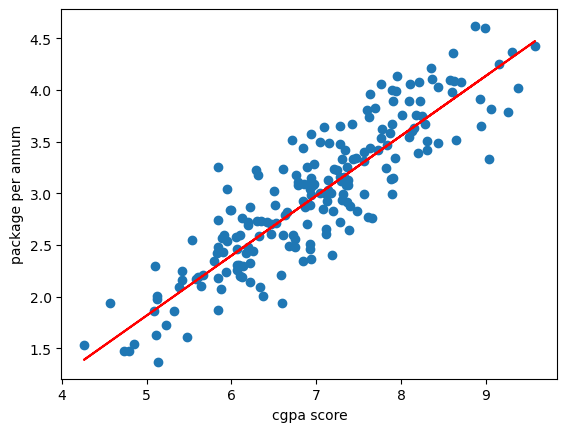

In [63]:
plt.scatter(x=df['cgpa'], y = df['package'])
plt.plot(x_train, linear_model.predict(x_train), color='red')
plt.xlabel('cgpa score')
plt.ylabel('package per annum')
plt.show()

In [57]:
new_data = pd.read_excel('cgpa_score.xlsx')
new_data.shape

(17, 1)

In [48]:
new_pacakge = linear_model.predict(new_data)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cgpa 
Feature names seen at fit time, yet now missing:
- cgpa

  warnings.warn(message, FutureWarning)


In [56]:
new_pacakge.shape

(17, 1)

In [50]:
package = pd.DataFrame(new_pacakge)
package

,0
0,2.977176
1,1.239611
2,4.714742
3,1.239611
4,0.660422
5,3.556365
6,1.818799
7,4.135553
8,4.714742
9,2.977176


In [60]:
new_package_basis_cgpa = pd.concat([new_data, package], axis=1)

In [62]:
new_package_basis_cgpa.to_csv('new_package_list.csv')